In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%autosave 0

Autosave disabled


#### Link to github repository
https://github.com/Quintencrum/DSCI-235

# Graduation Rates in Colorado by Instructional Program Service Type

Colorado's school system has a plethora of students from different walks of life. In order to provide appropriate support for these students, the various school districts often subset students into what is called instructional program service types. These instructional program service types include everything from students with disabilities to gifted-talented students.

The various school districts often analyze data about these subsets of students in order to understand and/or promote various ways of helping these students succeed as each student is different and providing various supports for students is generally the best way to help as many students succeed as possible. Generally, success is defined as students who either received a high school diploma, on-time GED, or non-diploma certificate.

The data set provided by the Colorado Department of Education provides completion counts and rates for students by county/organization and instructional program for the 2011-2012 school year. The instructional programs that are included are students with disabilities, limited English proficient, economically disadvantaged, migrant, title 1, homeless, and gifted-talented. A student can be in more than one instructional service type, however, the dataset does not present any of the possible overlaps. For each of these instructional service types, there is the total number of students, the number of graduates, the graduation rate, the completers total, and the completion rate. For a student to graduate they must receive their high school diploma. For a student to be counted as a completer they must either receive their diploma, on-time GED, or non-diploma certificate. The completion rate is all encompassing while the graduation rate only focuses on the high school diploma.

In [2]:
url = 'https://raw.githubusercontent.com/Quintencrum/DSCI-235/8ccb35083ef5d959d374364dbe5f7eded4c98119/District_Graduation_Data_by_Instructional_Program_Service_type_for_class_of_2011-12.csv'
data = pd.read_csv(url)
data = data.fillna('STATE')
data = data.set_index(['County Name','Organization Name'])
df = data.iloc[:-1,:] #get rid of last row which is the same as the first row
df.head()


Organization Code  \
County Name Organization Name                              
STATE       STATE TOTAL                            9,999   
ADAMS       MAPLETON 1                                10   
            ADAMS 12 FIVE STAR SCHOOLS                20   
            ADAMS COUNTY 14                           30   
            BRIGHTON 27J                              40   

                                       Students with Disabilities Final Grad Base  \
County Name Organization Name                                                       
STATE       STATE TOTAL                                                     5,775   
ADAMS       MAPLETON 1                                                         49   
            ADAMS 12 FIVE STAR SCHOOLS                                        250   
            ADAMS COUNTY 14                                                    59   
            BRIGHTON 27J                                                       66   

                                       Students with Disabilities Graduates Total  \
County Name Organization Name                                                       
STATE       STATE TOTAL                                                     3,099   
ADAMS       MAPLETON 1                                                         18   
            ADAMS 12 FIVE STAR SCHOOLS                                        118   
            ADAMS COUNTY 14                                                    32   
            BRIGHTON 27J                                                       33   

                                        Students with Disabilities Graduation Rate  \
County Name Organization Name                                                        
STATE       STATE TOTAL                                                       53.7   
ADAMS       MAPLETON 1                                                        36.7   
            ADAMS 12 FIVE STAR SCHOOLS                                        47.2   
            ADAMS COUNTY 14                                                   54.2   
            BRIGHTON 27J                                                      50.0   

                                       Students with Disabilities Completers Total  \
County Name Organization Name                                                        
STATE       STATE TOTAL                                                      3,222   
ADAMS       MAPLETON 1                                                          19   
            ADAMS 12 FIVE STAR SCHOOLS                                         127   
            ADAMS COUNTY 14                                                     32   
            BRIGHTON 27J                                                        35   

                                        Students with Disabilities Completion Rate  \
County Name Organization Name                                                        
STATE       STATE TOTAL                                                       55.8   
ADAMS       MAPLETON 1                                                        38.8   
            ADAMS 12 FIVE STAR SCHOOLS                                        50.8   
            ADAMS COUNTY 14                                                   54.2   
            BRIGHTON 27J                                                      53.0   

                                       Limited English Proficient Final Grad Base  \
County Name Organization Name                                                       
STATE       STATE TOTAL                                                     6,171   
ADAMS       MAPLETON 1                                                        219   
            ADAMS 12 FIVE STAR SCHOOLS                                        379   
            ADAMS COUNTY 14                                                   170   
            BRIGHTON 27J                                                      110   

                     

# Graduation/Completion rates between instructional service types

The first question that I wanted to ask was What is the relationship of graduation rates between the different instructional program service types? The figure below shows the mean graduation rate for each instructional program service type.

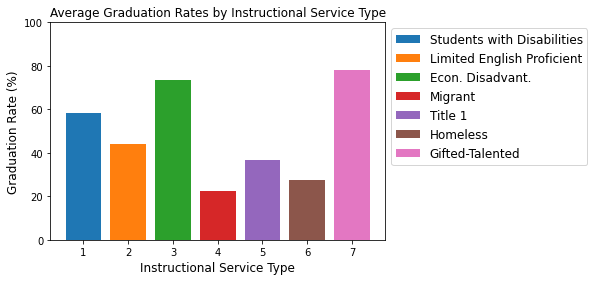

In [3]:
#Computes average graduation rate by instructional service type
x1 = df['Students with Disabilities Graduation Rate'].mean()
x2 = df['Limited English Proficient Graduation Rate'].mean()
x3 = df['Econ. Disadvant. Graduation Rate'].mean()
x4 = df['Migrant Graduation Rate'].mean()
x5 = df['Title 1 Graduation Rate'].mean()
x6 = df['Homeless Graduation Rate'].mean()
x7 = df['Gifted-Talented Graduation Rate'].mean()



#plots these values on chart
plt.bar(1,x1,label='Students with Disabilities')
plt.bar(2,x2,label='Limited English Proficient')
plt.bar(3,x3,label='Econ. Disadvant.')
plt.bar(4,x4,label='Migrant')
plt.bar(5,x5,label='Title 1')
plt.bar(6,x6,label='Homeless')
plt.bar(7,x7,label='Gifted-Talented')
plt.title("Average Graduation Rates by Instructional Service Type",fontsize='large')
plt.ylabel("Graduation Rate (%)",fontsize='large')
plt.xlabel("Instructional Service Type",fontsize='large')
plt.ylim(0,100)
plt.legend(loc=0,fontsize='large',bbox_to_anchor=(1,1));

From the Graduation Rates by Instructional Service Type plot we can see visually that the three instructional service types with the highest mean graduation rate in Colorado are gifted-talented, economically disadvantaged, and students with disabilities. It's hard to tell visually if there is a difference between the mean graduation rates for gifted-talented and economically disadvantaged students. Let's look at the actual percentages for these top 3 in order to see the differences more clearly.

In [4]:
print('Mean Gifted-Talented Graduation Rate: ',x7.round(decimals=4))
print('Mean Econ. Disadvant. Graduation Rate: ',x3.round(decimals=4))
print('Mean Students with Disabilities Graduation Rate: ',x1.round(decimals=4))

Mean Gifted-Talented Graduation Rate:  78.0495
Mean Econ. Disadvant. Graduation Rate:  73.6842
Mean Students with Disabilities Graduation Rate:  58.1848


Now we can see that the mean graduation rate for gifted-talented students is roughly 5% more than the mean graduation rate for economically disadvantaged students. How does this look compared to the mean completion rates for these instructional service types? The figure below shows the completion rate for each of these instructional service types.

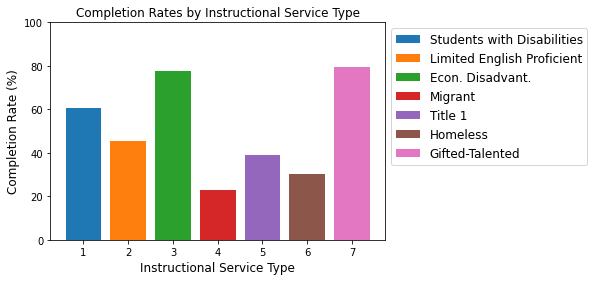

In [5]:
#Computes average completion rate by instructional service type
x11 = df['Students with Disabilities Completion Rate'].mean()
x21 = df['Limited English Proficient Completion Rate'].mean()
x31 = df['Econ. Disadvant. Completion Rate'].mean()
x41 = df['Migrant Completion Rate'].mean()
x51 = df['Title 1 Completion Rate'].mean()
x61 = df['Homeless Completion Rate'].mean()
x71 = df['Gifted-Talented Completion Rate'].mean()

#plots these values on chart
plt.bar(1,x11,label='Students with Disabilities')
plt.bar(2,x21,label='Limited English Proficient')
plt.bar(3,x31,label='Econ. Disadvant.')
plt.bar(4,x41,label='Migrant')
plt.bar(5,x51,label='Title 1')
plt.bar(6,x61,label='Homeless')
plt.bar(7,x71,label='Gifted-Talented')
plt.title("Completion Rates by Instructional Service Type",fontsize='large')
plt.ylabel("Completion Rate (%)",fontsize='large')
plt.xlabel("Instructional Service Type",fontsize='large')
plt.ylim(0,100)
plt.legend(loc=0,fontsize='large',bbox_to_anchor=(1,1));

The mean completion rates for the different instructional service types seem to follow the same pattern as the graduation rate which makes sense as graduation rate also counts towards the completion rate. We see that the top three instructional service types with the highest mean completion rates are the same as for the graduation rates of gifted-talented, economically disadvantaged, and students with disabilities. Let’s look at these percentages as the bars for gifted-talented and economically disadvantaged are too close to visually see the difference and while we are at it let’s compare these with the graduation rates.

In [6]:
print('Mean Gifted-Talented Graduation Rate: ',x7.round(decimals=4))
print('Mean Gifted-Talented Completion Rate: ',x71.round(decimals=4))
print()
print('Mean Econ. Disadvant. Graduation Rate: ',x3.round(decimals=4))
print('Mean Econ. Disadvant. Completion Rate: ',x31.round(decimals=4))
print()
print('Mean Students with Disabilities Graduation Rate: ',x1.round(decimals=4))
print('Mean Students with Disabilities Completion Rate: ',x11.round(decimals=4))

Mean Gifted-Talented Graduation Rate:  78.0495
Mean Gifted-Talented Completion Rate:  79.5723

Mean Econ. Disadvant. Graduation Rate:  73.6842
Mean Econ. Disadvant. Completion Rate:  77.7522

Mean Students with Disabilities Graduation Rate:  58.1848
Mean Students with Disabilities Completion Rate:  60.3902


Now we can tell that the difference in mean completion rates between gifted-talented and economically disadvantaged students is around only 2%. This is much smaller compared to the 5% for mean graduation rates. From this, we can also see that the economically disadvantaged instructional service type has the largest difference between graduation and completion rate of these three at approximately 4%. Next, let’s look at the differences in graduation rates and completion rates for all instructional services types to get a better understanding of the difference.

# Difference in Graduation rate and Completion rate
After looking into graduation and completion rates the top three instructional service types with the highest rates didn't change, however, the rates themselves were different, so I decided to look into these differences. The figure below shows the difference between the mean graduation rate and mean completion rate for each instructional service type.

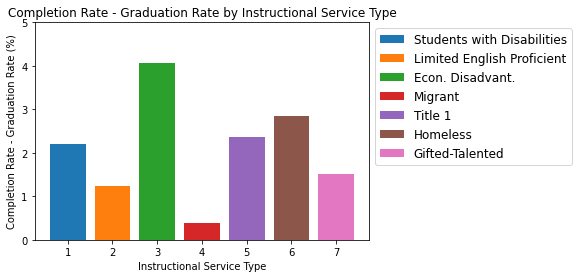

In [7]:
#Computes difference in the completion and graduation rates that were previously computed
plt.bar(1,x11-x1,label='Students with Disabilities')
plt.bar(2,x21-x2,label='Limited English Proficient')
plt.bar(3,x31-x3,label='Econ. Disadvant.')
plt.bar(4,x41-x4,label='Migrant')
plt.bar(5,x51-x5,label='Title 1')
plt.bar(6,x61-x6,label='Homeless')
plt.bar(7,x71-x7,label='Gifted-Talented')

#plots these values on chart
plt.title("Completion Rate - Graduation Rate by Instructional Service Type",fontsize='large')
plt.ylabel("Completion Rate - Graduation Rate (%)")
plt.xlabel("Instructional Service Type")
plt.ylim(0,5)
plt.legend(loc=0,fontsize='large',bbox_to_anchor=(1,1));

From the graph above we see just how much larger the difference in mean graduation and mean completion rates for students in the economically disadvantaged instructional service type is compared to all the other instructional service types. Another instructional service type that stands out to me is migrant. This has the lowest difference in mean graduation and means completion rates for all the service types. This may be significant in noting as the migrant instructional service type seems to have the lowest mean graduation and mean completion rates out of all the groups.

# County differences

Let’s look into counties and see how the mean completion rates vary among the counties. Focusing on just completion rates means that graduation rates are therefore included allowing for more information in a single plot. In order to avoid a mess of data I will focus on the top 5 largest counties in Colorado as of April 1, 2010, as enumerated by the 2010 United States Census Bureau. These include in order from largest to smallest El Paso, Denver, Arapahoe, Jefferson, and Adams County. The graphs below show the completion rates for gifted-talented, economically disadvantaged, and students with disabilities instructional service types for each of these counties.

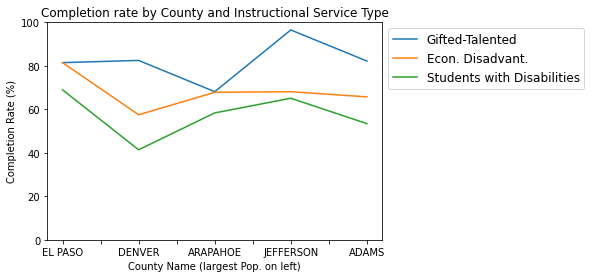

In [8]:
#Creates series of completion rates
gift_comp = df.groupby(['County Name'])['Gifted-Talented Completion Rate'].mean().loc[['EL PASO','DENVER','ARAPAHOE','JEFFERSON','ADAMS']]
econ_comp = df.groupby(['County Name'])['Econ. Disadvant. Completion Rate'].mean().loc[['EL PASO','DENVER','ARAPAHOE','JEFFERSON','ADAMS']]
dis_comp = df.groupby(['County Name'])['Students with Disabilities Completion Rate'].mean().loc[['EL PASO','DENVER','ARAPAHOE','JEFFERSON','ADAMS']]

#plots the rates computed above
comp_rate_df_1 = pd.DataFrame({'Gifted-Talented':gift_comp,'Econ. Disadvant.':econ_comp,'Students with Disabilities':dis_comp})

#Possible bar chart that could be included, however, it is not the best way to visualize the differences.
# comp_rate_df_1.plot.bar()
# plt.title("Completion rate by County and Instructional Service Type")
# plt.ylim(0,100)
# plt.ylabel("Completion Rate (%)")
# plt.legend(loc=0,fontsize='large',bbox_to_anchor=(1,1));


comp_rate_df_1.plot()
plt.title("Completion rate by County and Instructional Service Type")
plt.ylim(0,100)
plt.ylabel("Completion Rate (%)")
plt.xlabel("County Name (largest Pop. on left)")
plt.legend(loc=0,fontsize='large',bbox_to_anchor=(1,1));

One of the first things that can be seen from this graph is that the completion rate for students with disabilities and economically disadvantaged students seem to follow a similar pattern, however, economically disadvantaged students have a higher completion rate for these counties which is consistent with the mean completion rates between these groups as calculated above. Another observation is that the gifted-talented completion rate varies greatly between the various counties and doesn't follow the same trend as the other two instructional service types. Gifted-talented students in these counties seem to do better for the counties that have less population, Jefferson and Adams county. The trends themselves may have various factors that explain them, however, this is beyond the scope of this project. Let's see how these counties hold up against the state totals.

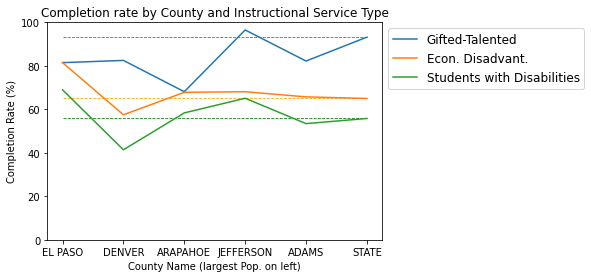

In [9]:
# making new dataframe with the state totals
gift_state = df.groupby(['County Name'])['Gifted-Talented Completion Rate'].mean().loc[['STATE']]
econ_state = df.groupby(['County Name'])['Econ. Disadvant. Completion Rate'].mean().loc[['STATE']]
dis_state = df.groupby(['County Name'])['Students with Disabilities Completion Rate'].mean().loc[['STATE']]
comp_rate_df_2 = pd.DataFrame({'Gifted-Talented':gift_state,'Econ. Disadvant.':econ_state,'Students with Disabilities':dis_state})
# combining dataframes
comp_rate_df_1 = comp_rate_df_1.append(comp_rate_df_2)

#plotting
comp_rate_df_1.plot()
plt.hlines(gift_state[0],0,5,linewidth=0.8,linestyle='dashed')
plt.hlines(econ_state[0],0,5,colors='orange',linewidth=0.8,linestyle='dashed')
plt.hlines(dis_state[0],0,5,colors='green',linewidth=0.8,linestyle='dashed')
plt.title("Completion rate by County and Instructional Service Type")
plt.ylim(0,100)
plt.ylabel("Completion Rate (%)")
plt.xlabel("County Name (largest Pop. on left)")
plt.legend(loc=0,fontsize='large',bbox_to_anchor=(1,1));


The dotted lines show the state average completion rate for each instructional service type. This provides us with greater insight into how the various county completion rates hold up to the state average. It seems that a majority of these higher population counties are below average when it comes to the gifted-talented completion rates. Denver county schools seem to be below average for all three instructional service types shown. Adams County is the only other county shown that a below average completion rate for students with disabilities.

# Conclusion

While looking through the data on the various instructional service types and their graduation and completion rates it seems that students that fall into the gifted-talented, economically disadvantaged, and students with disabilities instructional service types on average seem to graduate and/or complete at a higher rate than the other instructional service types. Similarly for students that fall into the instructional service type of economically disadvantaged that do not graduate still have a much higher rate of completion compared to all other instructional service types. Taking this into account the state might choose to redistribute its resources for students in the other instructional service types that were not mentioned in order to help those students graduate and/or complete at higher rates. This however does not take into account the differences by county. Often different counties require different resources for different instructional service types. For example, it seems that Denver county needs more resources for economically disadvantaged students and students with disabilities, while Arapahoe county needs a little bit for both of those groups of students and for gifted-talented students.

#### Source of County Populations in Colorado
https://en.wikipedia.org/wiki/List_of_counties_in_Colorado#Table_of_counties

#### Original Source of Data
https://data.colorado.gov/K-12/District-Graduation-Data-by-Instructional-Program-/cfyh-6xxg